In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
check_line_list = [2571,2581,2685,2790,2865]
save_root_path = 'statistics_figure_pruned_model_efficiency/'
rld = databaseloader(file_path='../log/orderlog/test_model_running_effciency_cpu_2020_8_14_174920.xls')
c = calculator()


In [2]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50']
[61.75387, 138.10234, 184.9352, 189.98808, 125.13875]
[3.0797854164247482, 0.8521034425043297, 1.4864891537152687, 4.324517723526782, 0.7567954953357088]
[59.436807957634066, 137.98749634681235, 184.68171651497005, 188.16331083233644, 125.05454274636767]
[3.1088775219931364, 0.8601525368250975, 1.50053074867688, 4.365367753361397, 0.7639442967835492]


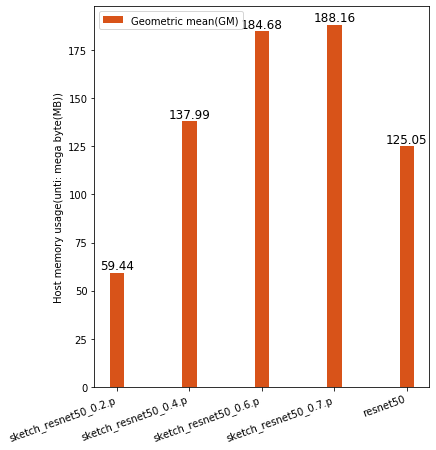

In [3]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

bar_width = 0.2
bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')

plt.ylabel('Host memory usage(unti: mega byte(MB))')
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [4]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50']
[2.3787837, 2.210417, 1.9948468, 2.1977894, 2.4124162]
[0.2574858224344405, 0.5086852021384778, 0.03296216335263802, 0.04246265042532649, 0.04923356525129208]
[2.2591456107475887, 1.9537802565588094, 1.986383352700536, 2.1832953586580848, 2.3960869223997707]
[0.25991807134654854, 0.5134903173009708, 0.0332735287909256, 0.04286375886044613, 0.049698632742734894]


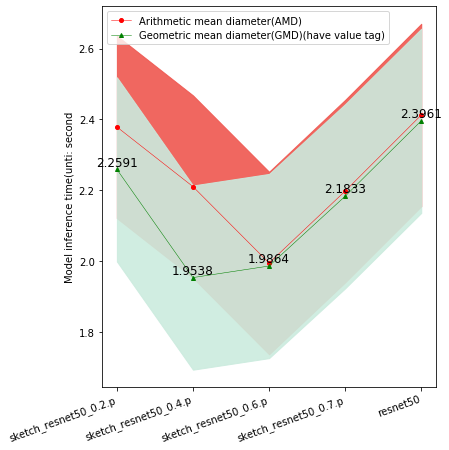

In [5]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')

plt.ylabel('Model inference time(unti: second')
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [6]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['sketch_resnet50_0.2.p', 'sketch_resnet50_0.4.p', 'sketch_resnet50_0.6.p', 'sketch_resnet50_0.7.p', 'resnet50']
[117.036385, 33.568108, 35.379776, 101.327515, 94.98744]
[0.12855352743100923, 0.13193761581744212, 0.05483928673310601, 11.576730714629349, 13.293972506679836]
[117.03383863136679, 33.559707379250916, 35.37823875124967, 76.25840732645773, 67.40208079584166]
[0.12976786293998543, 0.13318391792255824, 0.055357306693331054, 11.686086213973766, 13.41954932431296]


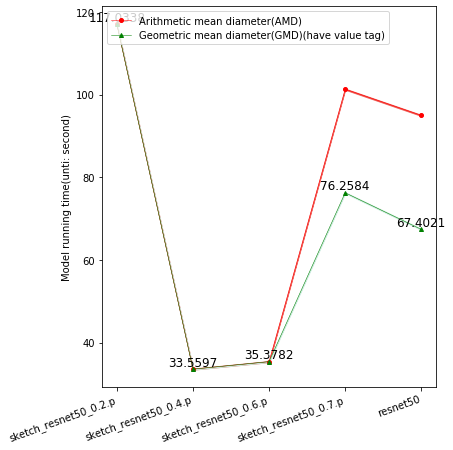

In [7]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')

plt.ylabel('Model running time(unti: second)')
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()